

# NLP I: `CountVectorizer`, `TfidfVectorizer`, and Modeling





## Learning Objectives
---

- Extract features from unstructured text by fitting and transforming with `CountVectorizer` and `TfidfVectorizer`.
- Describe how CountVectorizers and TF-IDFVectorizers work.
- Understand `stop_words`, `max_features`, `min_df`, `max_df`, and `ngram_range`.
- Implement `CountVectorizer` and `TfidfVectorizer` in a spam classification model.
- Use `GridSearchCV` and `Pipeline` with `CountVectorizer`.

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

ModuleNotFoundError: No module named 'matplotlib'

# Introduction to Text Feature Extraction

The models we've learned, like linear regression, logistic regression, and k-nearest neighbors, take in an `X` and a `y` variable.
- `X` is a matrix/dataframe of real numbers.
- `y` is a vector/series of real numbers.

Text data (also called natural language data) is not already organized as a matrix or vector of real numbers. We say that this data is **unstructured**.

> This lesson will focus on how to transform our unstructured text data into a numeric `X` matrix.

# Spam Classification Model

One common application of NLP is predicting "spam" vs. "ham," or "spam" vs. "not spam."

Can we predict real vs. promotional texts just based on what is written?

> This data set was taken from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/sms+spam+collection).

In [9]:
# Read in data.
spam = pd.read_csv('https://raw.githubusercontent.com/jfkoehler/NYU-Bootcamp/master/notebooks/module_2/2.09_intro-to-nlp/data/sms.csv',
                  index_col = 0)

# Check out first five rows.
spam.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# What is the size of our data set?
spam.shape

(5574, 2)

## Basic terminology

---

- A collection of text is a **document**. 
    - You can think of a document as a row in your feature matrix.
- A collection of documents is a **corpus**. 
    - You can think of your full dataframe as the corpus.

## Let's get our data
---

Convert ham/spam into binary labels:
- 0 for ham
- 1 for spam

In [13]:
import numpy as np

In [14]:
# Create label column
y = np.where(spam['class'] == 'ham', 0, 1)
y[:5]

array([0, 0, 1, 0, 0])

Let's set up our data for modeling:
- `X` will be the `message` column. **NOTE**: `CountVectorizer` requires a vector, so make sure you set `X` to be a `pandas` Series, **not** a DataFrame.
- `y` will be the `label` column

In [16]:
X = spam['text']


In [17]:
# Check what we need to check in a classification problem.
# This is the baseline --> accuracy
spam['class'].value_counts(normalize = True)

ham     0.865985
spam    0.134015
Name: class, dtype: float64

In [18]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

# Pre-Processing

Let's review some of the pre-processing steps for text data:

- Remove special characters
- Tokenizing
- Lemmatizing/Stemming
- Stop word removal

`CountVectorizer` actually can do a lot of this for us! It is important to keep these steps in mind in case you want to change the default methods used for each of these.

## `CountVectorizer`
---

The easiest way for us to convert text data into a structured, numeric `X` dataframe is to use `CountVectorizer`.

- **Count**: Count up how many times a token is observed in a given document.
- **Vectorizer**: Create a column (also known as a vector) that stores those counts.

![](./images/countvectorizer2.png)

In [19]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer()

In [20]:
# Fit the vectorizer on our corpus.
cvec.fit(X_train)

CountVectorizer()

In [22]:
# Transform the corpus.
X_train_cvec = cvec.transform(X_train)
X_test_cvec = cvec.transform(X_test)

<img src="./images/countvectorizer.png" alt="drawing" width="750"/>

[Source](https://towardsdatascience.com/nlp-learning-series-part-2-conventional-methods-for-text-classification-40f2839dd061).

In [31]:
# What does X_train look like now?
# print(X_train_cvec[:10])

In [32]:
# Check out the vocabulary
# cvec.vocabulary_

In [33]:
# get the feature names
cvec.get_feature_names_out()

array(['00', '000', '000pes', ..., 'èn', 'ú1', '〨ud'], dtype=object)

In [34]:
# Transform test
pd.DataFrame(X_train_cvec.todense(), columns = cvec.get_feature_names_out())

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zed,zeros,zhong,zindgi,zoe,zogtorius,zyada,èn,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


When we have unstructured text data, there is a lot of information in that text data.
- When we force unstructured text data to follow a "spreadsheet" or "dataframe" structure, we might lose some of that information.
- For example, CountVectorizer creates a vector (column) for each token and counts up the number of occurrences of each token in each document.

Our tokens are now stored as a **bag-of-words**. This is a simplified way of looking at and storing our data. 
- Bag-of-words representations discard grammar, order, and structure in the text but track occurrences.

At this point, we could fit a model (like a logistic regression model or $k$-nearest neighbors model) using our transformed data.



However, let's examine some of the different hyperparameters of `CountVectorizer`:
- `stop_words`
- `max_features`, `max_df`, `min_df`
- `ngram_range`

### Stopwords

---

Some words are so common that they may not provide legitimate information about the $Y$ variable we're trying to predict.

Let's see what our top-occurring words are right now.

<AxesSubplot: >

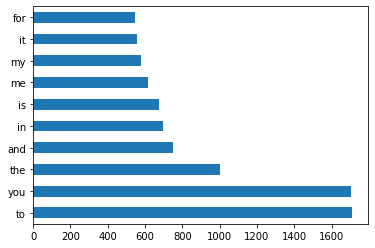

In [39]:
# Convert X_train into a DataFrame.
dtm = pd.DataFrame(X_train_cvec.todense(), columns = cvec.get_feature_names_out())

# plot top occuring words
dtm.sum().sort_values(ascending = False).head(10).plot(kind = 'barh')

`CountVectorizer` gives you the option to eliminate stopwords from your corpus when instantiating your vectorizer.

```python
cvec = CountVectorizer(stop_words='english')
```

You can optionally pass your own list of stopwords that you'd like to remove.
```python
cvec = CountVectorizer(stop_words=['list', 'of', 'words', 'to', 'stop'])
```

In [44]:
cvec = CountVectorizer(stop_words='english')
X_train_cvec2 = cvec.fit_transform(X_train)
pd.DataFrame(X_train_cvec2.todense(), columns=cvec.get_feature_names_out()).sum().sort_values(ascending = False)

ur          303
just        293
gt          230
lt          230
free        221
           ... 
main          1
bffs          1
bevies        1
beverage      1
〨ud           1
Length: 7198, dtype: int64

In [46]:
cvec.stop_words

'english'

### Vocabulary size

---
One downside to `CountVectorizer` is the size of its vocabulary (`cvec.get_feature_names()`) can get really large. We're creating one column for every unique token in your corpus of data!

There are three hyperparameters to help you control this.

1. You can set `max_features` to only include the $N$ most popular vocabulary words in the corpus.

```python
cvec = CountVectorizer(max_features=1_000) # Only the top 1,000 words from the entire corpus will be saved
```

2. You can tell `CountVectorizer` to only consider words that occur in **at least** some number of documents.

```python
cvec = CountVectorizer(min_df=2) # A word must occur in at least two documents from the corpus
```

3. Conversely, you can tell `CountVectorizer` to only consider words that occur in **at most** some percentage of documents.

```python
cvec = CountVectorizer(max_df=.98) # Ignore words that occur in > 98% of the documents from the corpus
```

Both `max_df` and `min_df` can accept either an integer or a float.
- An integer tells us the number of documents.
- A float tells us the percentage of documents.

In [41]:
cvec = CountVectorizer(max_features=500)

In [42]:
cvec.fit_transform(X_train)

<4180x500 sparse matrix of type '<class 'numpy.int64'>'
	with 38408 stored elements in Compressed Sparse Row format>

### N-Gram Range
---

`CountVectorizer` has the ability to capture $n$-word phrases, also called $n$-grams. Consider the following:

> The quick brown fox jumped over the lazy dog.

In the example sentence, the 2-grams are:
- 'the quick'
- 'quick brown'
- 'brown fox'
- 'fox jumped'
- 'jumped over'
- 'over the'
- 'the lazy'
- 'lazy dog'

The `ngram_range` determines what $n$-grams should be considered as features.

```python
cvec = CountVectorizer(ngram_range= (1,2)) # Captures every 1-gram and every 2-gram
```

<details><summary>How many 3-grams would be generated from the phrase "the quick brown fox jumped over the lazy dog?"</summary>

- Seven 3-grams.
    - 'the quick brown'
    - 'quick brown fox'
    - 'brown fox jumped'
    - 'fox jumped over'
    - 'jumped over the'
    - 'over the lazy'
    - 'the lazy dog'
</details>

<details><summary>Why might we want to change ngram_range to something other than (1,1)?</summary>

- We can work with multi-word phrases like "not good" or "very hot."
</details>

# Modeling

---

We may want to test lots of different values of hyperparameters in our CountVectorizer.

In [47]:
# Redefine training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

## Baseline accuracy

We need to calculate baseline accuracy in order to tell if our model is better than null model (predicting the plurality class).

In [50]:
# guessing the majority class every time
pd.Series(y_train).value_counts(normalize = True)

0    0.866095
1    0.133905
dtype: float64

## `GridSearchCV`
---

At this point, you could use your `pipeline` object as a model:

```python
# Estimate how your model will perform on unseen data
cross_val_score(pipe, X_train, y_train, cv=3).mean() 

# Fit your model
pipe.fit(X_train, y_train)

# Training score
pipe.score(X_train, y_train)

# Test score
pipe.score(X_test, y_test)
```

Since we want to tune over the `CountVectorizer`, we'll load our `pipeline` object into `GridSearchCV`.

In [51]:
pipe = Pipeline([('vectorizer', CountVectorizer()),
                ('model', LogisticRegression())])

In [52]:
# Search over the following values of hyperparameters:
# Maximum number of features fit: 2000, 3000, 4000, 5000
# Minimum number of documents needed to include token: 2, 3
# Maximum number of documents needed to include token: 90%, 95%
# Check (individual tokens) and also check (individual tokens and 2-grams).
params = {'vectorizer__max_features': [2000, 3000, 4000, 5000],
         'vectorizer__min_df': [2, 3],
         'vectorizer__max_df': [.9, .95]}

In [53]:
# Instantiate GridSearchCV.
grid = GridSearchCV(pipe, param_grid=params, cv = 5)
    # what object are we optimizing?
    # what parameters values are we searching?
    # 5-fold cross-validation.


<details><summary>How many models are we fitting here?</summary>

- 4 max_features
- 2 min_df
- 2 max_df
- 2 ngram_range
- 5-fold CV
- 4 * 2 * 2 * 2 * 5 = 160 models
</details>

In [54]:
# Fit GridSearch to training data.
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('model', LogisticRegression())]),
             param_grid={'vectorizer__max_df': [0.9, 0.95],
                         'vectorizer__max_features': [2000, 3000, 4000, 5000],
                         'vectorizer__min_df': [2, 3]})

In [55]:
# What's the best score?
grid.score(X_train, y_train)

0.9959828602035351

In [56]:
grid.score(X_test, y_test)

0.9820652173913044

In [57]:
# What are the best hyperparameters?
grid.best_params_

{'vectorizer__max_df': 0.9,
 'vectorizer__max_features': 2000,
 'vectorizer__min_df': 3}

In [58]:
# Get predictions
test_preds = grid.predict(X_test)

# Save confusion matrix values


In [59]:
from sklearn.metrics import ConfusionMatrixDisplay

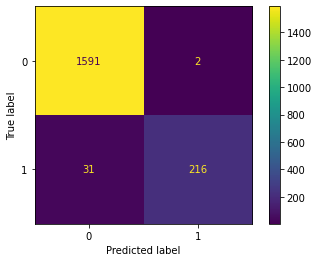

In [60]:
# View confusion matrix
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)

In [ ]:
 # Calculate the specificity (TRUE NEG RATE)


Congratulations! We've used `CountVectorizer` to transform our text data into something we can pass into a model.

But what if we want to do something more than just count up the occurrence of each token?

## Term Frequency-Inverse Document Frequency (TF-IDF) Vectorizer

---

When modeling, which word do you think tends to be the most helpful?
- Words that are common across all documents.
- Words that are rare across all documents.
- Words that are rare across some documents, and common across some documents.

<details><summary>Answer:</summary>

- Words that are common in certain documents but rare in other documents tend to be more informative than words that are common in all documents or rare in all documents.
- Example: If we were examining poetry over time, the word "thine" might be common in some documents but rare in most documents. The word "thine" is probably pretty informative in this case.
</details>

TF-IDF is a score that tells us which words are important to one document, relative to all other documents. Words that occur often in one document but don't occur in many documents contain more predictive power.

Variations of the TF-IDF score are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.
- If you want to see how it can be calculated, check out [the Wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) and [`sklearn`](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting) page.

<img src="./images/tfidfvectorizer.png" alt="drawing" width="750"/>

[Source](https://towardsdatascience.com/nlp-learning-series-part-2-conventional-methods-for-text-classification-40f2839dd061).

### Practice Using the `TfidfVectorizer`

---

`sklearn` provides a TF-IDF vectorizer that works similarly to the CountVectorizer.
- The arguments `stop_words`, `max_features`, `min_df`, `max_df`, and `ngram_range` also work here.

As you did above, instantiate the default `TfidfVectorizer`, then fit the spam and ham data.

In [ ]:
# Instantiate the transformer.


Let's visualize the top words.

In [ ]:
# convert training data to dataframe


# plot top occuring words


### Modeling Using the `TfidfVectorizer`

Let's set up a pipeline using tf-idf and Multinomial Naive Bayes.

<details><summary>What's the problem with this?</summary>

- Technically, we are supposed to have positive integers to use Multinomial Naive Bayes. Tf-idf does not give us positive integers.
- However, it will still work. Even the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB) says "The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work."
</details>

In [ ]:
# Let's set a pipeline up with two stages:
# 1. tf-idf vectorizer (transformer)
# 2. LogisticRegression (estimator)



In [ ]:
# Search over the following values of hyperparameters:
# Maximum number of features fit: 2000, 3000, 4000, 5000
# No stop words and english stop words
# Check (individual tokens) and also check (individual tokens and 2-grams).



In [ ]:
# Instantiate GridSearchCV.



In [ ]:
# Fit GridSearch to training data.


In [ ]:
# Best parameters


In [ ]:
# Score model on training set.


In [ ]:
# Score model on testing set.


In [ ]:
# Get predictions


# Save confusion matrix values





**EXIT QUESTIONS**: [link](https://forms.gle/ZSzHy544KG45J3F7A)